### Set the environment by importing the necessary dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Load the data, check for null values and duplicates, and check the data types

In [6]:
# uploading the data
flights_data = pd.read_csv("flight_dataset.csv")
print(flights_data.head())
flights_data.drop(columns=["Unnamed: 0"],inplace=True)

# checking for null and duplicated values, and the data type of the variables
print(flights_data.isna().sum())
print(flights_data.duplicated().sum())
print(flights_data.info())

   Unnamed: 0   airline   flight source_city departure_time stops  \
0           0  SpiceJet  SG-8709       Delhi        Evening  zero   
1           1  SpiceJet  SG-8157       Delhi  Early_Morning  zero   
2           2   AirAsia   I5-764       Delhi  Early_Morning  zero   
3           3   Vistara   UK-995       Delhi        Morning  zero   
4           4   Vistara   UK-963       Delhi        Morning  zero   

    arrival_time destination_city    class  duration  days_left  price  
0          Night           Mumbai  Economy      2.17          1   5953  
1        Morning           Mumbai  Economy      2.33          1   5953  
2  Early_Morning           Mumbai  Economy      2.17          1   5956  
3      Afternoon           Mumbai  Economy      2.25          1   5955  
4        Morning           Mumbai  Economy      2.33          1   5955  
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_cit

### Check the correlation between the numerical variables

/var/folders/ll/s4f5rf0s5z9gxj3tj3ry06m00000gn/T/ipykernel_40459/4206263923.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df = flights_data.corr()


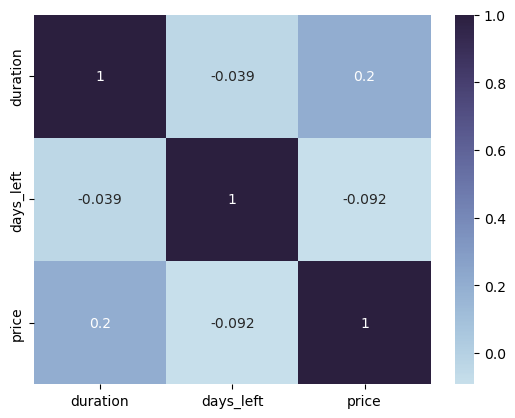

In [7]:
corr_df = flights_data.corr()
fig, ax = plt.subplots()
sns.heatmap(corr_df, annot=True, cmap=sns.color_palette('ch:s=.25,rot=-.25', as_cmap=True), ax=ax)
plt.savefig("Flight corr.png", dpi=300, bbox_inches='tight')
plt.show()

### Show the distribution of the numerical variables

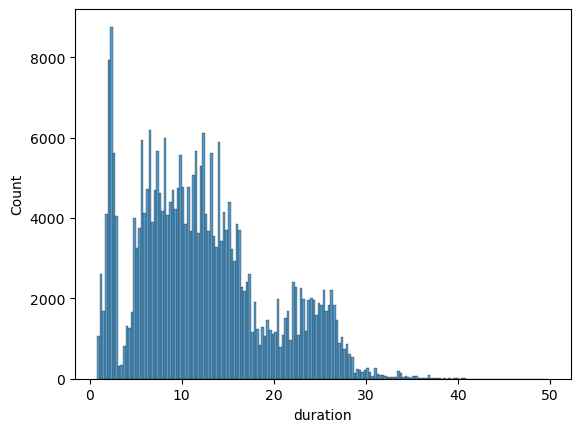

In [24]:
sns.histplot(data=flights_data['duration']);

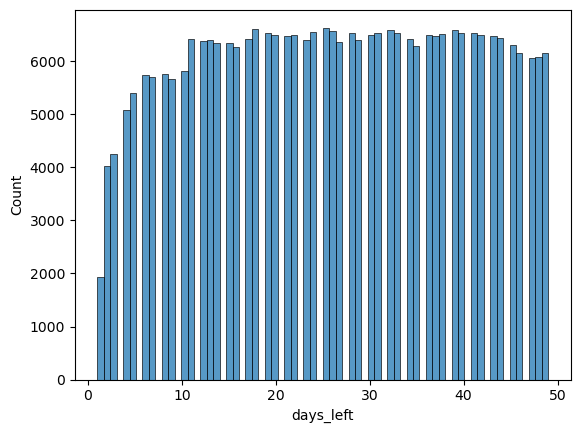

In [26]:
sns.histplot(data=flights_data['days_left']);

### Show the price according to the days left until the flight

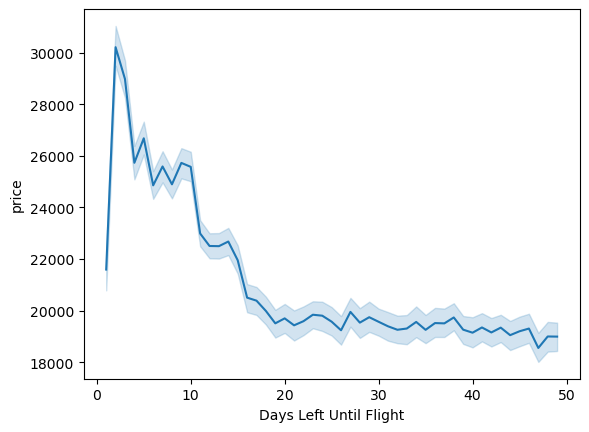

In [42]:
sns.lineplot(data=flights_data,x="days_left", y="price");
plt.xlabel("Days Left Until Flight")
plt.show()

### Show the price according to the duration of the flight

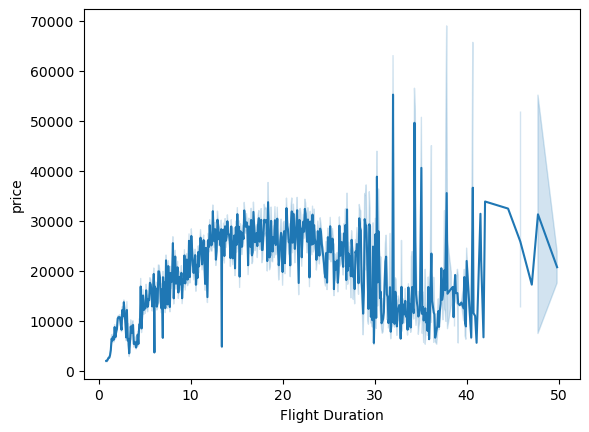

In [44]:
sns.lineplot(data=flights_data,x="duration", y="price");
plt.xlabel("Flight Duration")
plt.show()

### Check the distribution of the target variable

/var/folders/ll/s4f5rf0s5z9gxj3tj3ry06m00000gn/T/ipykernel_40459/4177198518.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


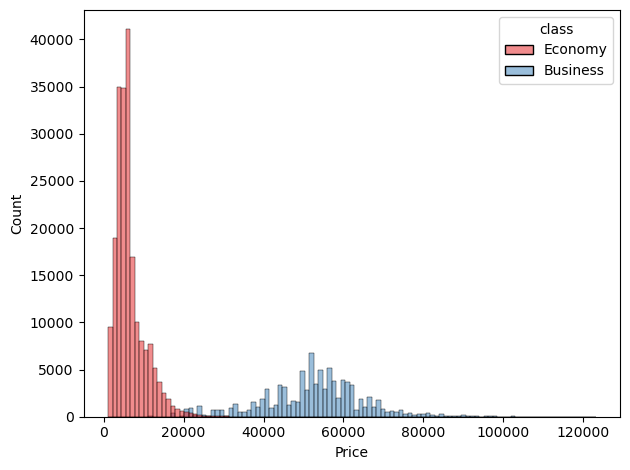

In [9]:
fig, ax = plt.subplots()
sns.histplot(data=flights_data, x="price", palette="Set1",hue="class", ax=ax)
plt.xlabel('Price')
fig.tight_layout()
plt.savefig("Target distribution.png", dpi=300, bbox_inches='tight')
fig.show()

### Show the range of price values for each of the class labels using box plots

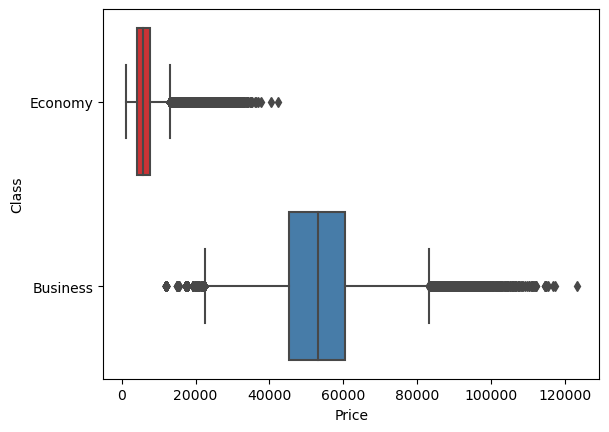

In [14]:
fig, ax = plt.subplots()
fig = sns.boxplot(data=flights_data,x="price", y="class", palette="Set1")
plt.xlabel('Price')
plt.ylabel('Class')
plt.savefig("Class_boxplots.png", dpi=300, bbox_inches='tight')
plt.show()

### Check the values of the categorical columns to decide on the best way to encode them

In [16]:
categorical_cols = ['airline','source_city','departure_time','arrival_time','destination_city','class','stops']
for col in categorical_cols:
    print(f"\n\n{col}\n\n",flights_data[f"{col}"].value_counts())



airline

 Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64


source_city

 Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: source_city, dtype: int64


departure_time

 Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: departure_time, dtype: int64


arrival_time

 Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: arrival_time, dtype: int64


destination_city

 Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: destination_city, dtype: int64


class

 Economy     206666
Business     93487
Name: class, dtype: int64


stops

 one            250863
zero            3600

### Show the range of price values for each airline

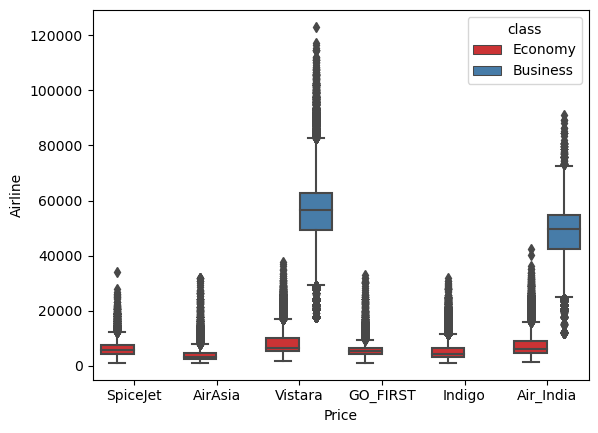

In [22]:
fig, ax = plt.subplots()
fig = sns.boxplot(data=flights_data,x="airline", y="price",hue="class",palette="Set1")
plt.xlabel('Price')
plt.ylabel('Airline')
plt.savefig("airlines_boxplots.png", dpi=300, bbox_inches='tight')
plt.show()

### Show the range of price values for each route

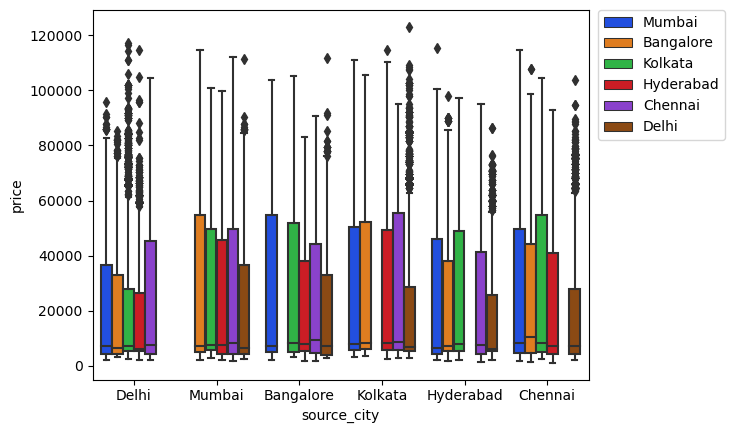

In [49]:
sns.boxplot(data=flights_data,x="source_city", y="price", hue="destination_city", palette="bright");
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);

### Show the range of price values for the departure time and arrival time

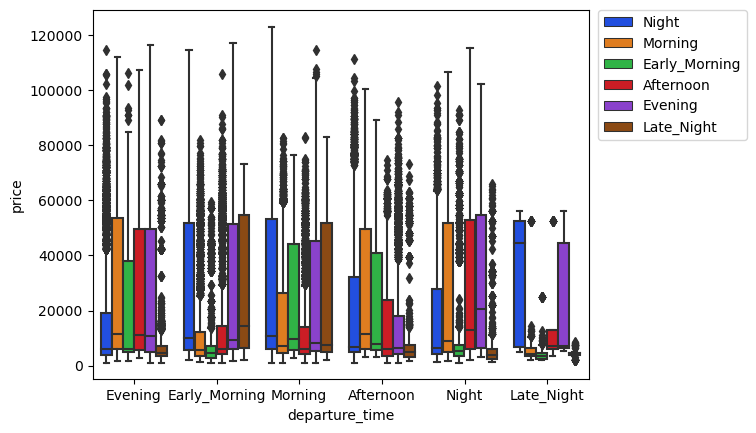

In [50]:
sns.boxplot(data=flights_data,x="departure_time", y="price", hue="arrival_time", palette="bright");
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);

### Show the range of price values for the quantity of stops

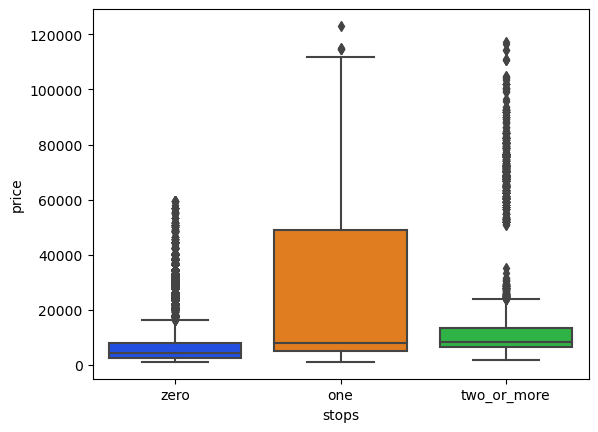

In [52]:
sns.boxplot(data=flights_data,x="stops", y="price", palette="bright");

## Stratifying the target variable

In [ ]:
# Calculate the cut values for the stratification bins
percentiles = [20, 40, 60, 80]
cut_values = flights_data[target].quantile([p/100 for p in percentiles])

# Create a new column with the bin labels
flights_data['bins'] = pd.cut(flights_data[target], bins=[-float("inf")] + list(cut_values) + [float("inf")])

# Split the data into training and testing sets, stratified by the bins
X_train, X_test, y_train, y_test = train_test_split(flights_data[features], flights_data[target], test_size=0.2, stratify=flights_data['bins'], random_state=42)

y_test = pd.DataFrame(y_test)
y_train = pd.DataFrame(y_train)

# Drop the bin column
X_train.drop('bins',axis=1,inplace=True)
X_test.drop('bins',axis=1,inplace=True)

## Encoding the categorical variables

In [ ]:
X_train_transformed = pd.get_dummies(X_train, columns = categorical_cols[0:6],drop_first=True)
X_test_transformed = pd.get_dummies(X_test, columns = categorical_cols[0:6],drop_first=True)

X_train_transformed['stops'] = X_train_transformed['stops'].replace({'zero':0,'one':1,'two_or_more':2})
X_test_transformed['stops'] = X_test_transformed['stops'].replace({'zero':0,'one':1,'two_or_more':2})


for col in categorical_cols:
    counts = pd.DataFrame(flights_data[col].value_counts())
    counts.reset_index(inplace=True)
    fig, ax = plt.subplots(figsize=(10, 6))
    ax = sns.barplot(x=counts["index"], y=counts[col], data=counts, palette="bright",)
    # set the title and axis labels for the plot
    plt.xlabel(col)
    plt.ylabel('Frequency')
    # show the plot
    plt.show()
    ax.figure.savefig(f"{col}.png",dpi=300)

## Scaling the numerical variables

In [ ]:
num_cols = ['duration','days_left']
ct = ColumnTransformer(
    [('scale', StandardScaler(), num_cols)], 
    remainder='passthrough')

num_scaled_train = ct.fit_transform(X_train_transformed[['duration','days_left']])
num_scaled_test = ct.transform(X_test_transformed[['duration','days_left']])

X_train_transformed.iloc[:, 1:3] = num_scaled_train
X_test_transformed.iloc[:, 1:3] = num_scaled_test

scaler_target = StandardScaler()

y_train['price'] = scaler_target.fit_transform(y_train[['price']].values)
y_test['price'] = scaler_target.transform(y_test[['price']].values)

## Regression Models

### 1. Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

# Set up a regression model
lin_reg = LinearRegression()

# Fit the model on the training data
lin_reg.fit(X_train_transformed, y_train)

# Use the trained model to make predictions on the test set
y_pred = lin_reg.predict(X_test_transformed)

# Assessment metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean absolute error:", mae)
print("Mean squared root error:", np.sqrt(mse))
print("R-squared:", r2)

### 2. Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Set up a regression model
tree_reg = DecisionTreeRegressor()

# Fit the model on the training data
tree_reg.fit(X_train_transformed, y_train)

# Use the trained model to make predictions on the test set
y_pred = tree_reg.predict(X_test_transformed)

# Assessment metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean absolute error:", mae)
print("Mean squared root error:", np.sqrt(mse))
print("R-squared:", r2)

### 3. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Create a random forest regressor
rf = RandomForestRegressor()

# Fit the model on the training data
rf.fit(X_train_transformed, y_train)

# Predict the target values for the test data
y_pred = rf.predict(X_test_transformed)

# Assessment metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean absolute error:", mae)
print("Mean squared root error:", np.sqrt(mse))
print("R-squared:", r2)

### 4. KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_transformed, y_train)

y_pred = knn.predict(X_test_transformed)

# Assessment metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean absolute error:", mae)
print("Mean squared root error:", np.sqrt(mse))
print("R-squared:", r2)

### 5. SVR

In [ ]:
from sklearn.svm import SVR

y_train_numpy = y_train.to_numpy()
y_train_numpy = np.ravel(y_train_numpy)

# Create a Support Vector Regression model and fit it on the training data
svr = SVR(kernel='rbf', C=1, gamma=0.1)
svr.fit(X_train_transformed, y_train_numpy)

y_pred = svr.predict(X_test_transformed)

# Assessment metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean absolute error:", mae)
print("Mean squared root error:", np.sqrt(mse))
print("R-squared:", r2)

From our assessment metrics we understood that the best performing model is the random forest one.
Now, we can move on to tuning our hyperparameters.

In [ ]:
# First, we define our parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train_transformed, y_train)


# Evaluating the results by looking at our best performing parameter and estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_